# Sheridan Kamal

## DATA 73500 - In Class Activity 3/30/20

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sb
import twitter as tw
import json
import math
import collections as cl
import matplotlib.pyplot as plt
import twitter as tw

In [2]:
CONSUMER_KEY = 'GDzHFRHpXG8GmazEa686SWrW8'
CONSUMER_SECRET = 'ugtGSyqQZWLxehCCJu7fBQxPquWai1grAaPVANeOC0EMZSUvF1'
OAUTH_TOKEN = '62099456-hWeDi3BLYTm6is402uqrMYUcdhZJD2DmVpUfDdiAw'
OAUTH_TOKEN_SECRET = 'nvys4S2sORvS13iWbQhW2QRZ5KXaJze5u8T5UlJVhdJkT'

auth = tw.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = tw.Twitter(auth=auth)

In [3]:
htag = '%23CUNY'
n = 25000
cuny = twitter_api.search.tweets(q=htag, count=n)
cuny_statuses = cuny['statuses']
cuny_df = pd.read_json(json.dumps(cuny_statuses))
cuny_df.head()

,created_at,id,id_str,text,truncated,entities,extended_entities,metadata,source,in_reply_to_status_id,...,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status
0,2020-05-13 02:44:22+00:00,1260400466212655110,1260400466212655104,RT @HunterPSCCUNY: #austeritykills #CutCOVIDNo...,False,"{'hashtags': [{'text': 'austeritykills', 'indi...","{'media': [{'id': 1260399775507234816, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,False,1,0,False,False,0.0,en,NaN,NaN,NaN
1,2020-05-13 02:43:42+00:00,1260400297958150145,1260400297958150144,#austeritykills #CutCOVIDNotCUNY \nthank you A...,False,"{'hashtags': [{'text': 'austeritykills', 'indi...","{'media': [{'id': 1260399775507234816, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,False,1,1,False,False,0.0,en,NaN,NaN,NaN
2,2020-05-13 02:32:44+00:00,1260397535006461953,1260397535006461952,@gyrizar Please corroborate. #CUNY \nhttps://t...,False,"{'hashtags': [{'text': 'CUNY', 'indices': [29,...","{'media': [{'id': 1260397368182280199, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,False,0,0,False,False,0.0,en,NaN,NaN,NaN
3,2020-05-13 02:28:22+00:00,1260396437910716422,1260396437910716416,"@studentactivism yeah, imagining our basement ...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://about.twitter.com/products/tw...",1.260396e+18,...,False,0,0,False,False,NaN,en,NaN,NaN,NaN
4,2020-05-13 02:18:34+00:00,1260393973354463233,1260393973354463232,"Hello Everyone 🌼, enjoy Lehman student meals d...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://instagram.com"" rel=""nofollow"">...",NaN,...,False,0,0,False,False,0.0,en,NaN,NaN,NaN


In [4]:
cuny_df.columns

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'extended_entities', 'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'possibly_sensitive', 'lang', 'quoted_status_id',
       'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [5]:
cuny_df['retweet_count'].describe()

count    100.000000
mean       1.620000
std        1.790999
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max       10.000000
Name: retweet_count, dtype: float64

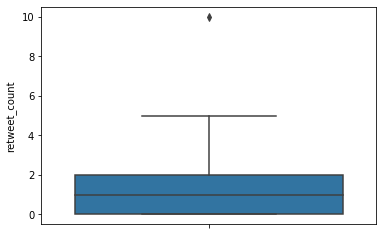

In [6]:
sb.boxplot(y='retweet_count', hue='retweeted_status', data=cuny_df)

In [7]:
cuny_df.dtypes

created_at                   datetime64[ns, UTC]
id                                         int64
id_str                                     int64
text                                      object
truncated                                   bool
entities                                  object
extended_entities                         object
metadata                                  object
source                                    object
in_reply_to_status_id                    float64
in_reply_to_status_id_str                float64
in_reply_to_user_id                      float64
in_reply_to_user_id_str                  float64
in_reply_to_screen_name                   object
user                                      object
geo                                      float64
coordinates                              float64
place                                     object
contributors                             float64
retweeted_status                          object
is_quote_status     

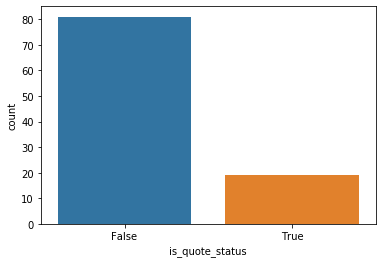

In [8]:
sb.countplot(x='is_quote_status', data=cuny_df)

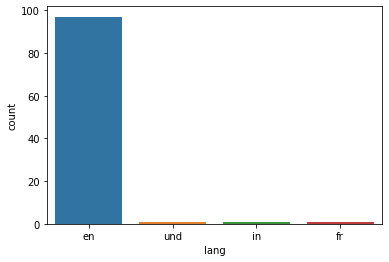

In [9]:
sb.countplot(x='lang', data=cuny_df)

In [10]:
cuny_df['text'].head()

0    RT @HunterPSCCUNY: #austeritykills #CutCOVIDNo...
1    #austeritykills #CutCOVIDNotCUNY \nthank you A...
2    @gyrizar Please corroborate. #CUNY \nhttps://t...
3    @studentactivism yeah, imagining our basement ...
4    Hello Everyone 🌼, enjoy Lehman student meals d...
Name: text, dtype: object

In [11]:
cuny_eng = cuny_df[cuny_df['lang'] == 'en'] 
cuny_eng['text'].head()

0    RT @HunterPSCCUNY: #austeritykills #CutCOVIDNo...
1    #austeritykills #CutCOVIDNotCUNY \nthank you A...
2    @gyrizar Please corroborate. #CUNY \nhttps://t...
3    @studentactivism yeah, imagining our basement ...
4    Hello Everyone 🌼, enjoy Lehman student meals d...
Name: text, dtype: object

Text(0.5, 1.0, 'Frequency Distribution of Most Common Words in #CUNY Tweets')

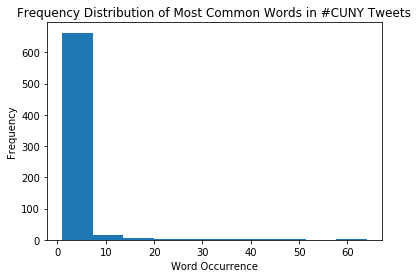

In [12]:
words = [ w.lower() 
         for t in cuny_eng['text'] 
            for w in t.split () ]
count = cl.Counter(words)
plt.hist(count.values())
plt.ylabel('Frequency')
plt.xlabel('Word Occurrence')
plt.title('Frequency Distribution of Most Common Words in #CUNY Tweets')

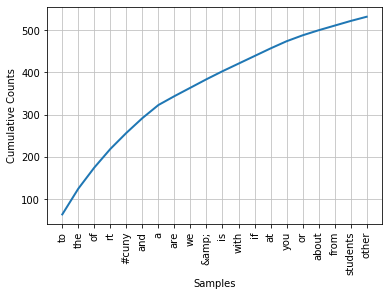

In [13]:
import nltk

cuny_freq = nltk.FreqDist(words)
cuny_freq.plot(20, cumulative=True)

In [14]:
print(cuny_freq['#CUNY']) 
print(cuny_freq['#cuny']) 
print(cuny_freq.freq('#CUNY'))

0
38
0.0
